In [1]:
# scan data directories
import glob

nature_file_list = []
nature_file_list += glob.glob('../data/interim/AmbisonicSoundLibrary/nature/*')
nature_file_list += glob.glob('../data/interim/GoogleAudioSet/Outside, rural or natural/*')
nature_file_list += glob.glob('../data/interim/youtube/NatureSoundscapes/*')
nature_file_list += glob.glob('../data/interim/youtube/NomadicAmbience_nature/*')

city_file_list = []
city_file_list += glob.glob('../data/interim/GoogleAudioSet/Outside, urban or manmade/*')
city_file_list += glob.glob('../data/interim/youtube/NomadicAmbience_city/*')
city_file_list += glob.glob('../data/interim/SONYC/**/*.pkl')



In [2]:
import pickle
import pandas as pd
import numpy as np

df_indices_all = []
df_indices_bg = []
df_indices_fg = []
for filename in nature_file_list:
    # open a file, where you stored the pickled data
    file = open(filename, 'rb')

    # dump information to that file
    output = pickle.load(file)
    df_indices_all.append(output['df_indices'])
    df_indices_bg.append(output['df_indices_bg'])
    df_indices_fg.append(output['df_indices_fg'])

    # close the file
    file.close()
df_indices_nature = pd.concat(df_indices_all)
df_indices_bg_nature = pd.concat(df_indices_bg)
df_indices_fg_nature = pd.concat(df_indices_fg)



df_indices_all = []
df_indices_bg = []
df_indices_fg = []
for filename in city_file_list:
    # open a file, where you stored the pickled data
    file = open(filename, 'rb')

    # dump information to that file
    output = pickle.load(file)
    df_indices_all.append(output['df_indices'])
    df_indices_bg.append(output['df_indices_bg'])
    df_indices_fg.append(output['df_indices_fg'])

    # close the file
    file.close()
df_indices_city = pd.concat(df_indices_all)
df_indices_bg_city = pd.concat(df_indices_bg)
df_indices_fg_city = pd.concat(df_indices_fg)

In [3]:
from scipy.stats import ttest_ind
statistic, pvalue = ttest_ind(df_indices_nature, df_indices_city, nan_policy='omit')

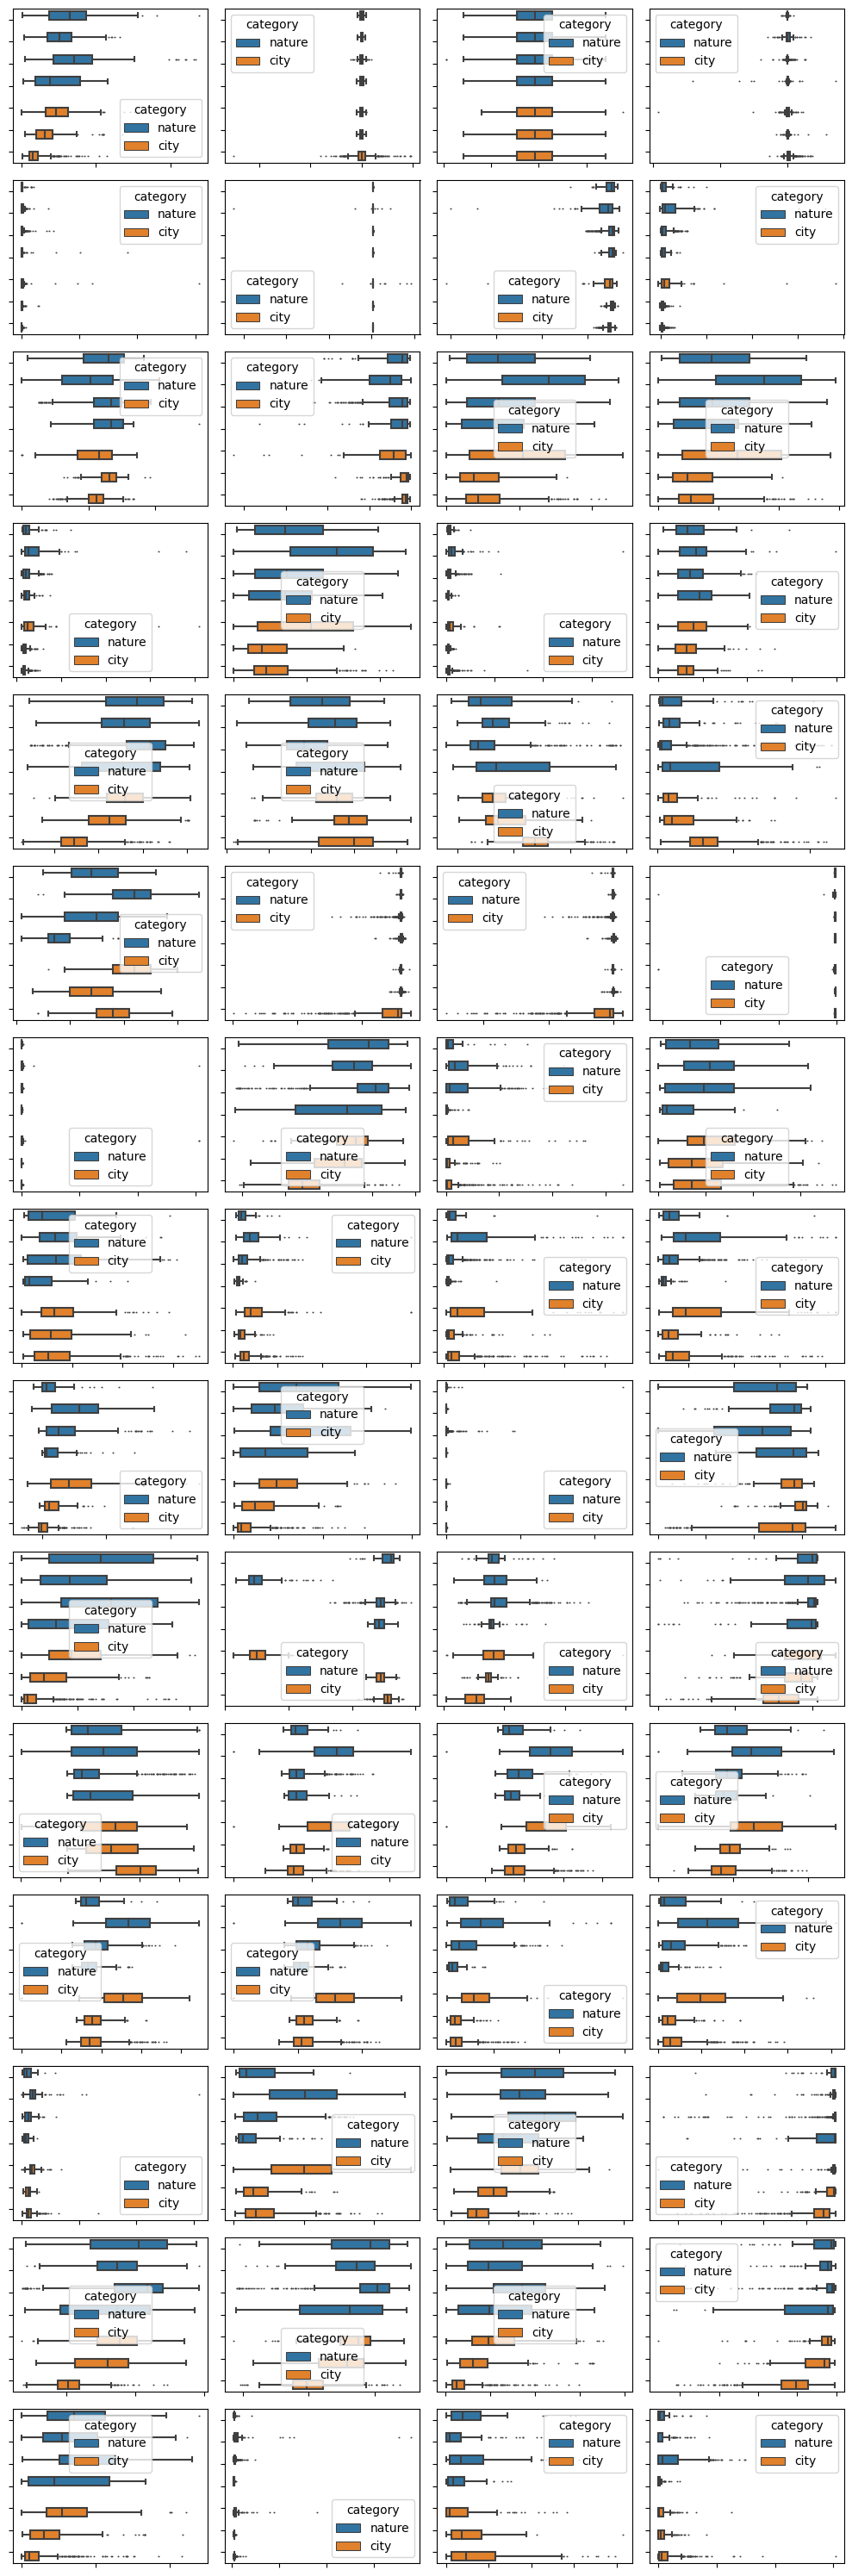

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

nature_source_list = ['nature_'+i.rsplit('/', 2)[1] for i in nature_file_list]
city_source_list = ['city_'+i.rsplit('/', -1)[3] for i in city_file_list]

df_indices_nature['source'] = nature_source_list
df_indices_nature['category'] = 'nature'
df_indices_city['source'] = city_source_list
df_indices_city['category'] = 'city'
df_indices_all = pd.concat([df_indices_nature, df_indices_city])

fig, ax = plt.subplots(15,4, figsize=(10,30))
for n in range(len(df_indices_all.columns)-2):
    n1 = int(np.floor(n/4))
    n2 = n%4
    sns.boxplot(y='source', x=df_indices_all.columns[n], hue='category', data=df_indices_all, ax = ax[n1,n2], fliersize = 0.5)
    ax[n1,n2].set(xlabel=None)
    ax[n1,n2].set(ylabel=None)
    ax[n1,n2].set(xticklabels=[])
    ax[n1,n2].set(yticklabels=[])
    plt.tight_layout()



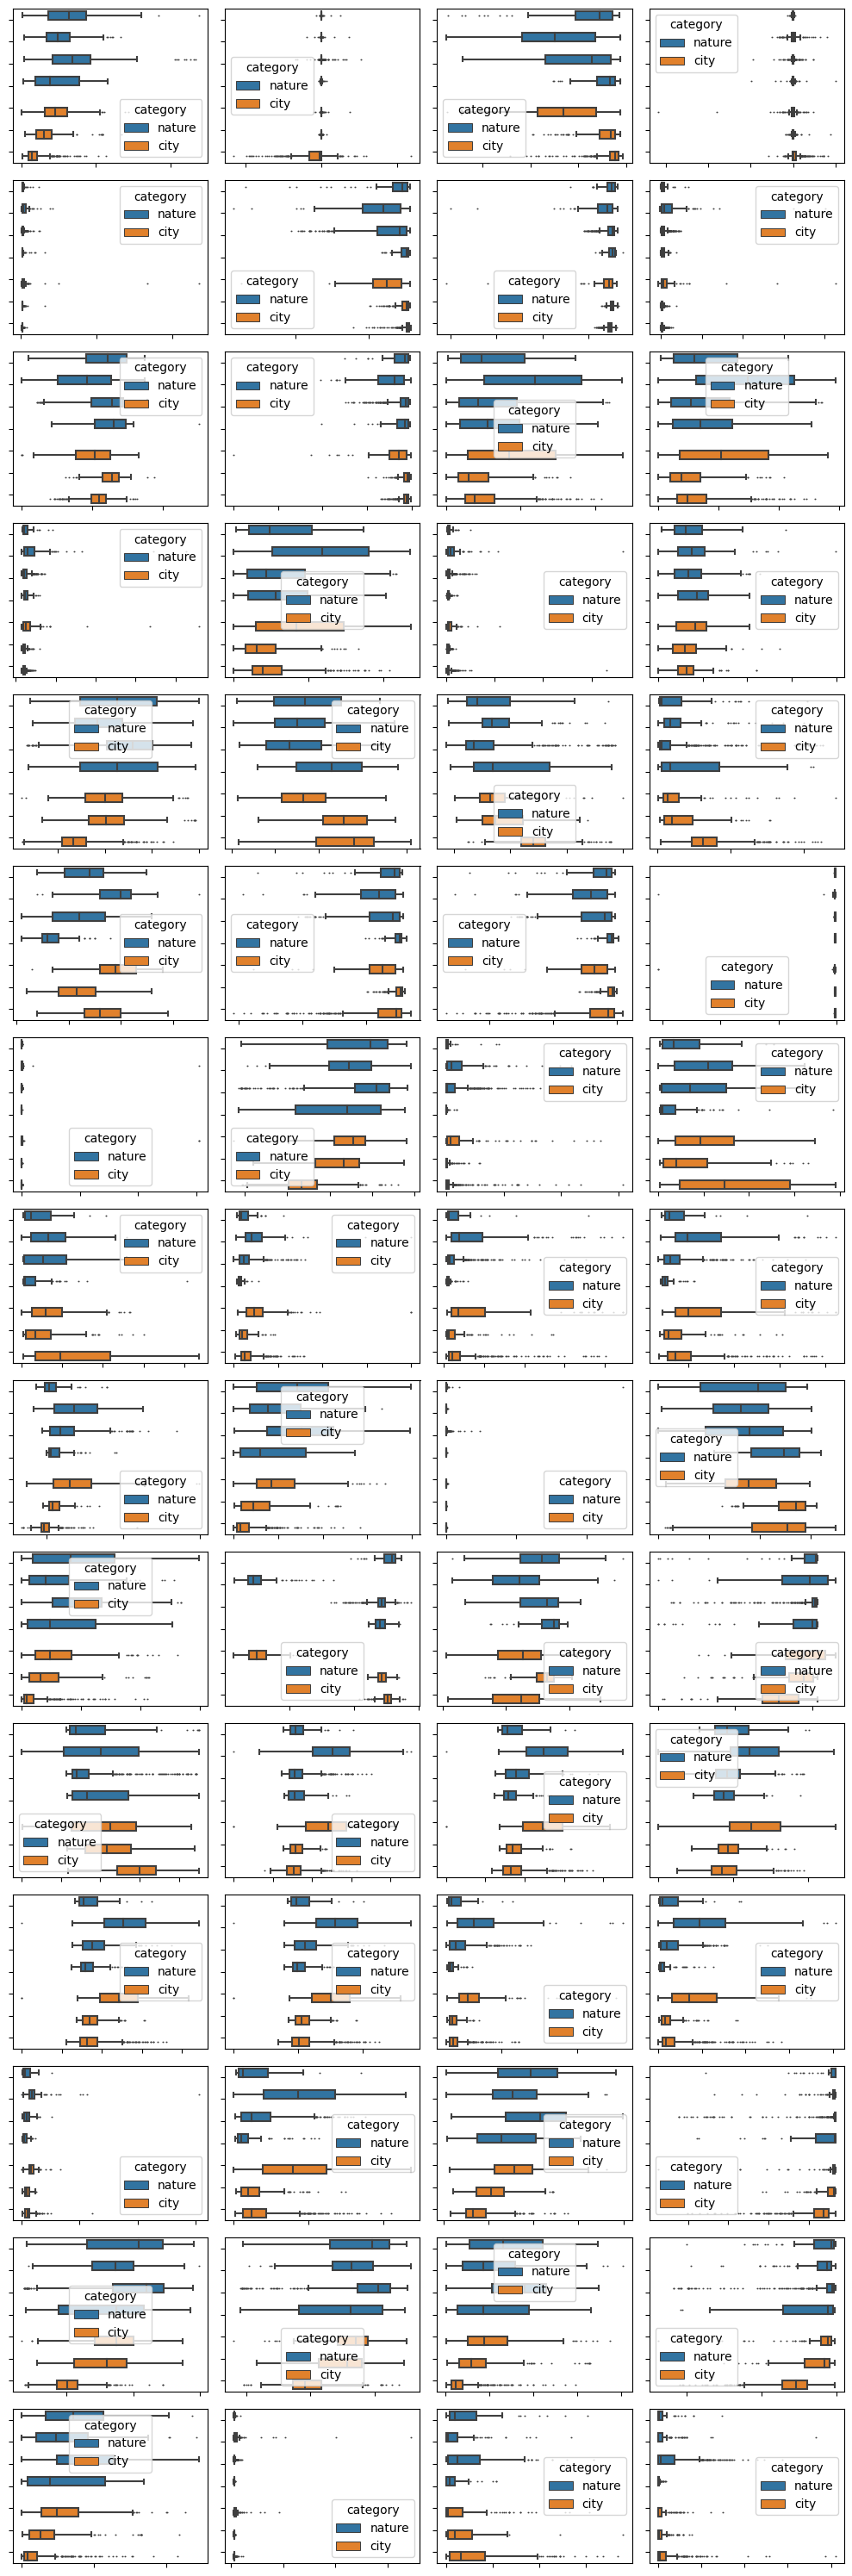

In [5]:
nature_source_list = ['nature_'+i.rsplit('/', 2)[1] for i in nature_file_list]
city_source_list = ['city_'+i.rsplit('/', -1)[3] for i in city_file_list]

df_indices_bg_nature['source'] = nature_source_list
df_indices_bg_nature['category'] = 'nature'
df_indices_bg_city['source'] = city_source_list
df_indices_bg_city['category'] = 'city'
df_indices_bg_all = pd.concat([df_indices_bg_nature, df_indices_bg_city])

fig, ax = plt.subplots(15,4, figsize=(10,30))
for n in range(len(df_indices_bg_all.columns)-2):
    n1 = int(np.floor(n/4))
    n2 = n%4
    sns.boxplot(y='source', x=df_indices_bg_all.columns[n], hue='category', data=df_indices_bg_all, ax = ax[n1,n2], fliersize = 0.5)
    ax[n1,n2].set(xlabel=None)
    ax[n1,n2].set(ylabel=None)
    ax[n1,n2].set(xticklabels=[])
    ax[n1,n2].set(yticklabels=[])
    plt.tight_layout()

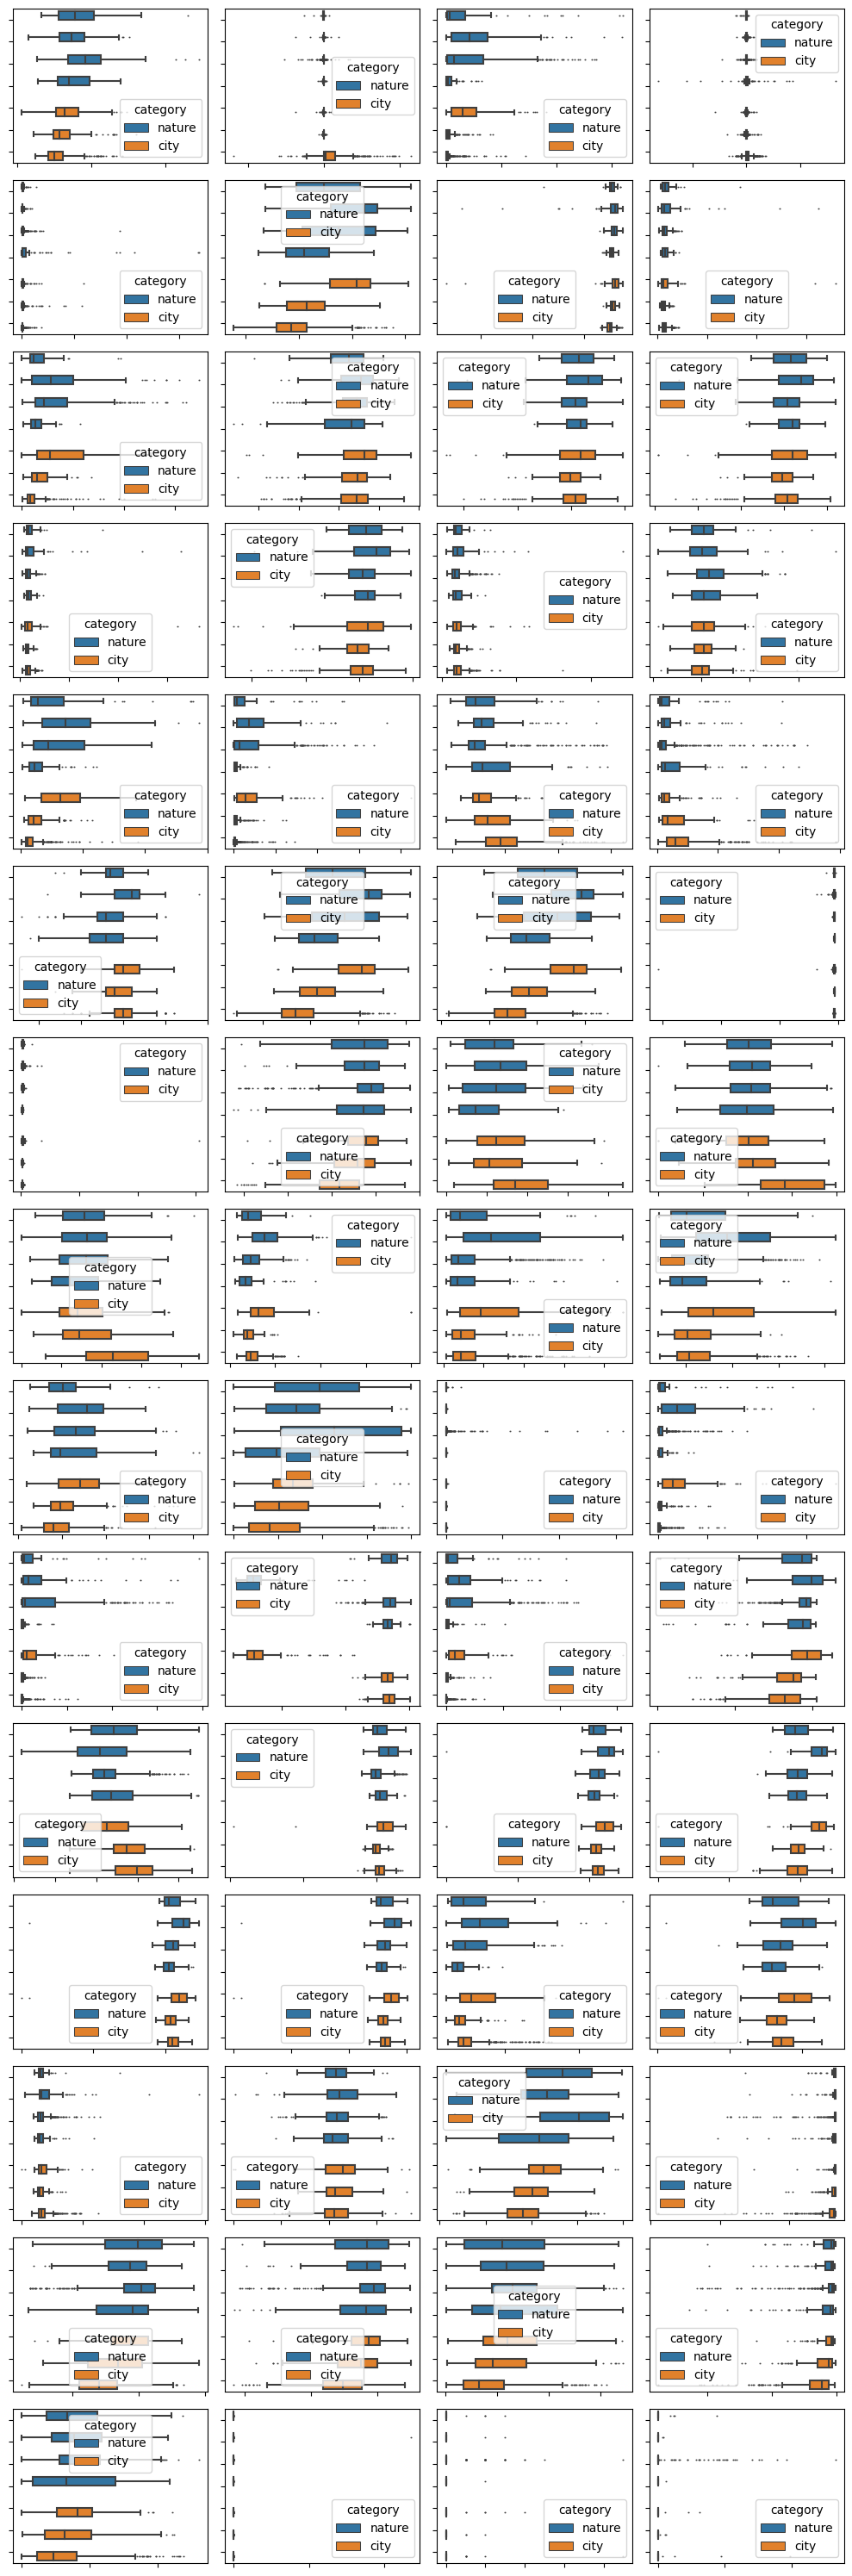

In [6]:
df_indices_fg_nature['source'] = nature_source_list
df_indices_fg_nature['category'] = 'nature'
df_indices_fg_city['source'] = city_source_list
df_indices_fg_city['category'] = 'city'
df_indices_fg_all = pd.concat([df_indices_fg_nature, df_indices_fg_city])

fig, ax = plt.subplots(15,4, figsize=(10,30))
for n in range(len(df_indices_fg_all.columns)-2):
    n1 = int(np.floor(n/4))
    n2 = n%4
    sns.boxplot(y='source', x=df_indices_fg_all.columns[n], hue='category', data=df_indices_fg_all, ax = ax[n1,n2], fliersize = 0.5)
    ax[n1,n2].set(xlabel=None)
    ax[n1,n2].set(ylabel=None)
    ax[n1,n2].set(xticklabels=[])
    ax[n1,n2].set(yticklabels=[])
    plt.tight_layout()